In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data.head(4)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...


In [6]:
data.shape


(106, 3)

In [7]:
data.dtypes


,0
Class,object
id,object
Sequence,object


In [8]:
# Refining and structuring the data

# Build our dataset using custom pandas dataframe
classes = data.loc[:,'Class']
classes.head()
print()
print(classes.value_counts())


Class
+    53
-    53
Name: count, dtype: int64


In [9]:
# generate list of DNA sequence
sequence = list(data.loc[:, 'Sequence'])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [10]:
#Remove tab from each sequence
dic = {}
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    #append class assignment
    nucleotides.append(classes[i])

    dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [11]:
# Convert Dict object into dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [12]:
# transpose dataframe into correct format
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [13]:
# Rename the 57th column as it is our classes
df.rename(columns = {57:'Class'}, inplace = True)

In [14]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [15]:
temp = df.copy(deep=True)
temp = temp.drop(['Class'], axis = 1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [16]:
# Encoding using one-hot encoder:

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp)
print(enc.categories_)
df1 = enc.transform(temp).toarray()
del temp
# df1[1:3]

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [17]:
# Saving the one-hot encoder

with open("drive/MyDrive/Dataset/DataScience-Pianalytix-Models/EColi-encoder.pickle", "wb") as f:
    pickle.dump(enc, f)

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Dataset/DataScience-Pianalytix-Models/EColi-encoder.pickle'

In [18]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Fixing the classes column:

df["Class"] = df["Class"].replace(to_replace =["+"], value =1)
df["Class"] = df["Class"].replace(to_replace =["-"], value =0)
df_new["Classes"] = df['Class']
df_new.head()

<ipython-input-19-d95c47eef3f8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Class"] = df["Class"].replace(to_replace =["-"], value =0)


,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [20]:
y = df_new['Classes'].values# numerical_df['Class'].values
X = df_new.drop(['Classes'], axis = 1).values# numerical_df.drop(['Class'], axis = 1).values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tqdm import tqdm

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Convert sparse matrices to dense
    dense_transformer = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x)

    if isinstance(model, Sequential):
        # Neural network-specific preprocessing
        num_classes = len(np.unique(y_train))
        y_train_cat = to_categorical(y_train, num_classes=num_classes)
        y_test_cat = to_categorical(y_test, num_classes=num_classes)

        # Reshape data for sequential models
        x_train_seq = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
        x_test_seq = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

        # Compile and fit the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(x_train_seq, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Evaluate the model
        y_pred_probs = model.predict(x_test_seq)
        y_pred = np.argmax(y_pred_probs, axis=1)

    else:
        # Traditional ML model pipeline
        pipe = Pipeline([
            ('to_dense', dense_transformer),
            ('model', model),
        ])
        pipe.fit(x_train, y_train)
        y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
    # 'LSTM Neural Network': Sequential([
    #     LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    #     Dropout(0.2),
    #     Dense(len(np.unique(y_train)), activation='softmax'),
    # ]),
    # 'GRU Neural Network': Sequential([
    #     GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    #     Dropout(0.2),
    #     Dense(len(np.unique(y_train)), activation='softmax'),
    # ]),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

# Find the best model based on accuracy
max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

 20%|██        | 3/15 [00:00<00:02,  4.06it/s]/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 93%|█████████▎| 14/15 [00:02<00:00,  9.16it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 15/15 [00:02<00:00,  6.40it/s]

+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |   0.925926 |    0.916667 | 0.941176 |   0.923295 | [[15  2]           |
|                                 |            |             |          |            |  [ 0 10]]          |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |   0.888889 |    0.884615 | 0.911765 |   0.886396 | [[14  3]           |
|                                 |            |             |          |            |  [ 0 10]]          |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi

Best Model: Extra Trees Classifier
Accuracy: 0.8889
Precision: 0.8846
Recall: 0.9118
F1 Score: 0.8864


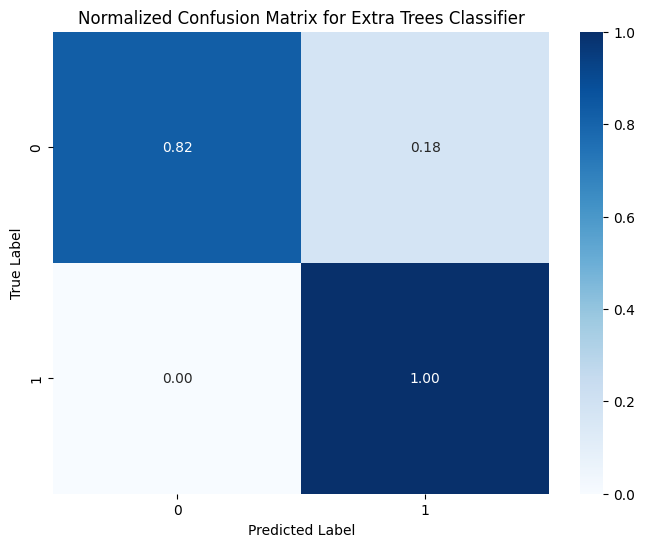

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, class_names, title="Confusion Matrix", normalize=False):
    """
    Function to plot confusion matrix using seaborn.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# After identifying the best model
best_model = models[best_model_name]

# Retrain the best model on the entire training set and evaluate on the test set
accuracy, precision, recall, f1, cm = evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Print evaluation metrics
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot normalized confusion matrix
class_names = [str(i) for i in np.unique(y_test)]
plot_confusion_matrix(cm, class_names, title=f"Normalized Confusion Matrix for {best_model_name}", normalize=True)

# Visualizing additional metrics as bar plots
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}



In [25]:
# Ensure X_train and X_test are converted to dense format
if hasattr(X_train, "toarray"):
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()
else:
    X_train_dense = X_train
    X_test_dense = X_test

# Train the model
model = HistGradientBoostingClassifier()
model.fit(X_train_dense, y_train)  # Training the model

# Calculate metrics on the training set
train_predictions = model.predict(X_train_dense)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='macro')
train_recall = recall_score(y_train, train_predictions, average='macro')
train_f1 = f1_score(y_train, train_predictions, average='macro')

# Calculate metrics on the test set
test_predictions = model.predict(X_test_dense)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='macro')
test_recall = recall_score(y_test, test_predictions, average='macro')
test_f1 = f1_score(y_test, test_predictions, average='macro')

# Create a DataFrame for metrics
import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

print(metrics_df)

      Metric  Train Set  Test Set
0   Accuracy        1.0  0.925926
1  Precision        1.0  0.916667
2     Recall        1.0  0.941176
3   F1 Score        1.0  0.923295


In [27]:

from joblib import dump, load

# Save the model to a file
dump(model, "dna_sequencing.joblib")
print("Model saved successfully.")

Model saved successfully.
